In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
import matplotlib.colors as colors
import matplotlib as mpl

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dat = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ADNI_ICM_random200.xlsx') #read data
dat.columns = [col[1:-1] for col in dat.columns]
dat.head()

,Subject_ID,Gender,Age,Diagnosis,ACR_R,AGWM_R,AG_R,ALIC_R,Amyg_R,AnteriorBasalForebrain_R,BCC_R,CGC_R,CGH_R,CP_R,CST_R,Caud_R,Caudate_tail_R,CentralSul_R,CerebellumGM_R,CerebellumWM_R,Chroid_LVetc_R,CinguSul_R,Cl_R,CuWM_R,Cu_R,ECCL_R,EC_R,ENT_R,Fimbria_R,FrontSul_R,FuG_R,FuWM_R,Fx/ST_R,Fx_R,GCC_R,GP_R,Hippo_R,HypoThalamus_R,ICP_R,ICP_cb_R,...,RGWM_L,RG_L,RLIC_L,RedNc_L,SCC_L,SCP_L,SCR_L,SFG_L,SFG_PFC_L,SFG_pole_L,SFO_L,SFWM_L,SFWM_PFC_L,SFWM_pole_L,SLF_L,SMG_L,SMWM_L,SOG_L,SOWM_L,SPG_L,SPWM_L,SS_L,STG_L,STG_L_pole,STWM_L,STWM_L_pole,Snigra_L,SylFrontSul_L,SylParieSul_L,SylTempSul_L,TempSul_L,Thalamus_L,dorsalWM_ACC_L,dorsal_ACC_L,rostralWM_ACC_L,rostral_ACC_L,subcallosalWM_ACC_L,subcallosal_ACC_L,subgenualWM_ACC_L,subgenual_ACC_L
0,'Subject_1','M',69.6712,'AD/MCI',14005,2932,10758,2073,1725,363,4147,3159,1409,2003,1413,3716,290,2323,50666,8248,333,4243,392,3739,5956,615,2755,756,8,14887,15105,4718,1100,651,3028,1379,3041,632,706,474,...,1680,5732,2975,301,6104,873,16220,11247,9673,2381,241,7813,7559,121,7189,9156,3803,2716,3536,9225,10100,3959,12642,4666,9079,991,273,2597,529,4382,1349,5452,1424,10839,12,2082,95,369,226,1828
1,'Subject_2','F',85.3836,'AD/MCI',8811,2115,9418,2317,1590,276,4048,2391,1150,1659,1436,4367,278,2845,45738,7272,355,3914,408,2656,4692,447,2764,725,0,15200,13159,3883,988,719,2314,1409,2685,544,632,431,...,1482,4176,2553,256,4954,771,13793,9028,8035,2229,246,6444,6004,212,5812,8004,3117,3069,3160,7108,7433,2695,10690,4164,7499,1088,246,4129,466,5731,1368,4578,1187,9102,5,1782,38,342,128,1438
2,'Subject_3','F',86.2904,'NORMAL',11982,2634,11015,2589,1803,299,4603,2956,1464,2085,1678,4240,399,3205,46771,9745,435,4114,380,2856,4840,474,2817,735,5,14150,10333,3460,1156,807,2932,1546,3875,703,762,554,...,1546,4742,3121,284,7361,995,16091,9129,7831,2097,309,6732,6034,117,8043,8006,3493,1617,2150,8471,8110,2877,11115,4197,8294,1127,323,3201,484,4128,1337,5987,1601,9902,92,1956,39,472,127,1644
3,'Subject_4','M',73.9342,'NORMAL',11919,3688,11322,2058,1868,217,3960,3822,1498,1957,1694,2526,422,2554,62518,9326,217,3104,364,2651,4318,398,2826,825,4,15325,13571,4844,1176,786,2614,1388,3684,728,739,457,...,1713,5551,2725,275,5380,793,15244,11068,9244,2296,206,8735,8231,103,7276,8617,3762,2280,2966,5583,6187,2921,10520,4620,8496,1162,295,2819,562,3766,1187,5005,1705,12301,12,1724,97,329,133,1485
4,'Subject_5','M',79.9918,'AD/MCI',10588,3010,11657,2161,1275,232,4941,2939,1168,2325,2015,3956,264,3278,55929,8228,512,5092,308,3902,5702,271,2519,532,0,18041,13273,4299,1084,680,2379,1372,2549,594,713,489,...,1389,4079,2652,282,7056,900,16090,10262,8491,1795,204,7129,6568,92,7668,8135,3862,2784,3206,8252,9308,3109,10122,3256,7379,594,277,3441,719,4161,2131,5239,1517,11344,45,1823,28,312,90,1758


In [ ]:
dat_demographic = dat[['Subject_ID','Gender','Age','Diagnosis']]
dat_demographic['Subject_ID'] = dat_demographic['Subject_ID'].str.strip("\'")
dat_demographic['Gender'] = dat_demographic['Gender'].str.strip("\'")
dat_demographic['Diagnosis'] = dat_demographic['Diagnosis'].str.strip("\'")


df = dat[['Subject_ID','Diagnosis','AG_R','AG_L','Insula_R','Insula_L','PoCG_R','PoCG_L','PrCu_R','PrCu_L','SMG_R','SMG_L' ,'SPG_R','SPG_L']]
df['Subject_ID'] = df['Subject_ID'].str.strip("\'")
df['Diagnosis'] = df['Diagnosis'].str.strip("\'")
df.head()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,Subject_ID,Diagnosis,AG_R,AG_L,Insula_R,Insula_L,PoCG_R,PoCG_L,PrCu_R,PrCu_L,SMG_R,SMG_L,SPG_R,SPG_L
0,Subject_1,AD/MCI,10758,6358,7183,6567,10893,11337,6783,7223,9084,9156,6550,9225
1,Subject_2,AD/MCI,9418,6029,6825,6494,9066,8872,5033,5991,7544,8004,5151,7108
2,Subject_3,NORMAL,11015,7269,5987,6145,10155,10768,6692,7639,8265,8006,6894,8471
3,Subject_4,NORMAL,11322,5850,6310,6170,9347,12113,4426,4859,11005,8617,4910,5583
4,Subject_5,AD/MCI,11657,6737,5196,5189,12172,12538,6941,8185,10989,8135,6577,8252


In [ ]:
dat_demographic.head()

,Subject_ID,Gender,Age,Diagnosis
0,Subject_1,M,69.6712,AD/MCI
1,Subject_2,F,85.3836,AD/MCI
2,Subject_3,F,86.2904,NORMAL
3,Subject_4,M,73.9342,NORMAL
4,Subject_5,M,79.9918,AD/MCI


           Subject_ID  Gender  Age
Diagnosis                         
AD/MCI            136     136  136
NORMAL             64      64   64
                  Subject_ID  Age
Diagnosis Gender                 
AD/MCI    F               55   55
          M               81   81
NORMAL    F               32   32
          M               32   32
Diagnosis  Gender
AD/MCI     F         55
           M         81
NORMAL     F         32
           M         32
Name: Subject_ID, dtype: int64


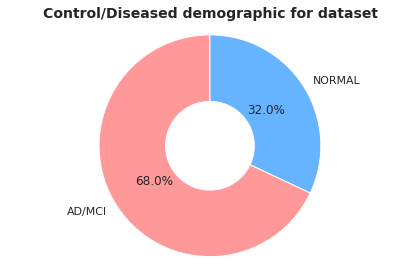

In [ ]:
# Control/Diseased demographic

num_Diag = dat_demographic.groupby(['Diagnosis']).count()
print(num_Diag)
diag = pd.unique(dat_demographic['Diagnosis'])

#dat_demographic.head()

num_gender = dat_demographic.groupby(['Diagnosis','Gender']).count()
gender = pd.unique(dat_demographic['Gender'])
print(num_gender)


labels_diag = diag
labels_gender = gender
sizes_Diag = num_Diag['Subject_ID']
sizes_Gend = num_gender['Subject_ID']

print(sizes_Gend)

colors = ['#ff9999','#66b3ff']
fig1, ax1 = plt.subplots()
ax1.pie(sizes_Diag, colors = colors, labels=labels_diag, autopct='%1.1f%%', startangle=90)

#draw circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
plt.title('Control/Diseased demographic for dataset',fontsize = 14,fontweight = 'bold')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()




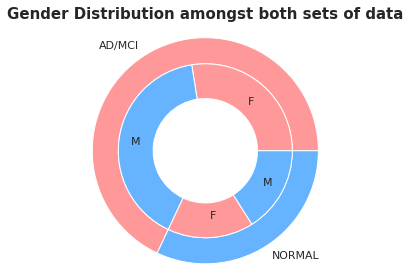

In [ ]:
labels_gender = ['F', 'M', 'F', 'M']
sizes_Gend = ['55','81','32','32']

# Create colors
colors = ['#ff9999','#66b3ff']
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(sizes_Diag, radius=1.3, labels=labels_diag, colors=colors)
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)


# show it

mypie2, _ = ax.pie(sizes_Gend, radius=1.3-0.3, labels=labels_gender, labeldistance=0.75, colors = colors)
plt.title('Gender Distribution amongst both sets of data\n', fontdict = {'fontsize' : 15},fontweight = 'bold')
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
plt.show()

In [ ]:
sorted_df = df.groupby('Diagnosis')
sorted_df.first()



,Subject_ID,AG_R,AG_L,Insula_R,Insula_L,PoCG_R,PoCG_L,PrCu_R,PrCu_L,SMG_R,SMG_L,SPG_R,SPG_L
Diagnosis,,,,,,,,,,,,,
AD/MCI,Subject_1,10758,6358,7183,6567,10893,11337,6783,7223,9084,9156,6550,9225
NORMAL,Subject_3,11015,7269,5987,6145,10155,10768,6692,7639,8265,8006,6894,8471


(array([    0.,  5000., 10000., 15000., 20000., 25000.]),
 <a list of 6 Text major ticklabel objects>)

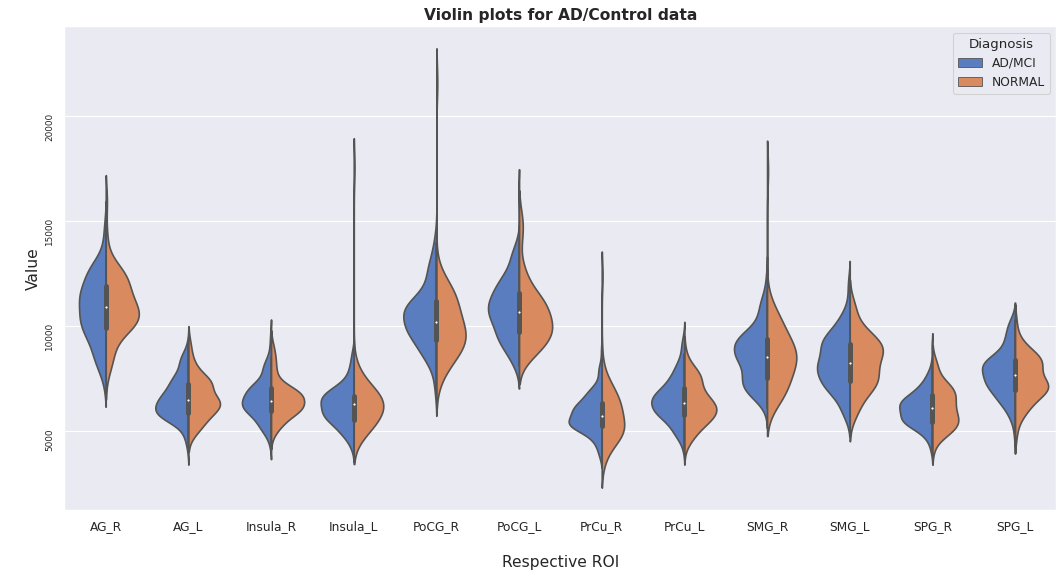

In [ ]:
newdf = df.drop(columns = ['Subject_ID'])
violin_df = pd.melt(newdf,id_vars=['Diagnosis'])


plt.figure(figsize=(16,8), dpi=80)
sns.violinplot(x="variable", y="value", hue="Diagnosis", data=violin_df, palette="muted",split=True)
plt.title('Violin plots for AD/Control data',fontweight="bold", fontsize=14)
plt.xlabel('\nRespective ROI', fontsize=14), plt.ylabel('\nValue', fontsize=14)
plt.yticks(fontsize=8, rotation=90)

In [ ]:
sorted_df.groups
df_ad = sorted_df.get_group('AD/MCI')
df_control = sorted_df.get_group('NORMAL')

# Some Stats
stats_df = sorted_df.agg(['mean','std'])
stats_df.round(2)

#actual stats
control_stats = df_control.agg(['mean','std']).round(2)
ad_stats = df_ad.agg(['mean','std']).round(2)

#control_stats.head()
stats_df

AG_R               ...        SPG_L             
                   mean          std  ...         mean          std
Diagnosis                             ...                          
AD/MCI     10807.419118  1539.151621  ...  7781.669118  1107.286701
NORMAL     10971.953125  1439.976294  ...  7495.453125  1032.430941

[2 rows x 24 columns]

In [ ]:
df_control.iloc[36]

Subject_ID    Subject_115
AG_R                12203
AG_L                 8055
Insula_R             6847
Insula_L             6594
PoCG_R              11472
PoCG_L              11068
PrCu_R               5985
PrCu_L               6648
SMG_R                9855
SMG_L                9815
SPG_R                7328
SPG_L                8350
Name: 114, dtype: object

In [ ]:
cols = list(df.columns)
cols.remove('Subject_ID')
cols.remove('Diagnosis')

z_dat = pd.DataFrame()
for col in cols:
  z = col
  z_dat[z] = (df[col] - control_stats[col]['mean'])/control_stats[col]['std']
z_dat.head()

,AG_R,AG_L,Insula_R,Insula_L,PoCG_R,PoCG_L,PrCu_R,PrCu_L,SMG_R,SMG_L,SPG_R,SPG_L
0,-0.148578,-0.249121,0.753359,0.121859,0.394117,0.512642,0.755673,0.911166,0.291684,0.682883,0.419604,1.675223
1,-1.079147,-0.596486,0.336958,0.076287,-0.581126,-1.141476,-0.568039,-0.359658,-0.633802,-0.235697,-1.063235,-0.375280
2,0.029896,0.712732,-0.637744,-0.141586,0.000176,0.130820,0.686840,1.340275,-0.200506,-0.234102,0.784220,0.944907
3,0.243094,-0.785478,-0.262053,-0.125979,-0.431130,1.033371,-1.027178,-1.527330,1.446138,0.253096,-1.318678,-1.852377
4,0.475736,0.151035,-1.557778,-0.738396,1.076840,1.318564,0.875185,1.903481,1.436523,-0.131240,0.448223,0.732786


(Text(0.5, 52.0, '\nROI within Parietal Lobe'),
 Text(32.0, 0.5, '\nSubject number'))

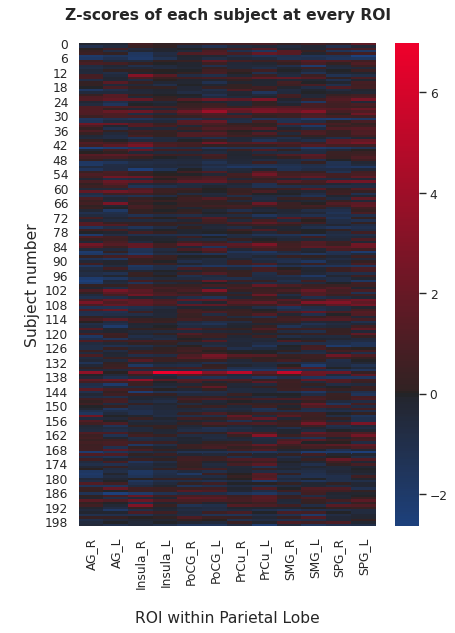

In [ ]:
plt.figure(figsize=(6, 8), dpi=80)
cmap = sns.diverging_palette(259, 10, s= 100, n = 80, center = 'dark', as_cmap=True)
#sns.heatmap(z_dat, center=0, cmap=sns.diverging_palette(2, 20, as_cmap=True), vmin = -1, vmax = 1)
#sns.color_palette("icefire", as_cmap=True)
sns.heatmap(z_dat, center=0, cmap = cmap)
plt.title('Z-scores of each subject at every ROI\n',fontweight="bold", fontsize=14)
plt.xlabel('\nROI within Parietal Lobe', fontsize=14), plt.ylabel('\nSubject number', fontsize=14)

(Text(0.5, 52.0, '\nROI within Parietal Lobe'),
 Text(32.0, 0.5, '\nSubject number'))

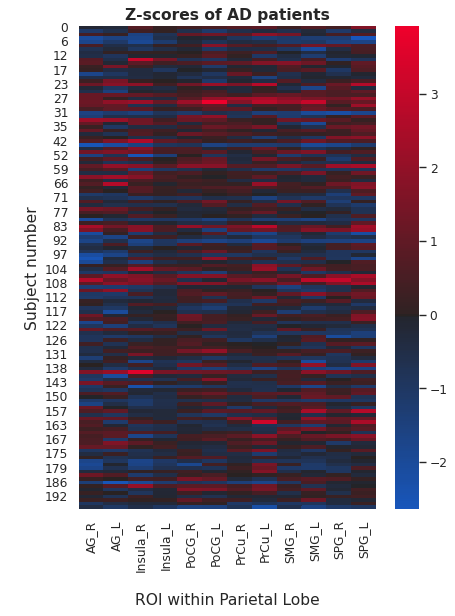

In [ ]:
# Alzheimers Dataset barcodes

cols = list(df_ad.columns)
cols.remove('Subject_ID')

z_dat_ad = pd.DataFrame()
for col in cols:
  z = col
  z_dat_ad[z] = (df_ad[col] - control_stats[col]['mean'])/control_stats[col]['std']


plt.figure(figsize=(6,8), dpi=80)
cmap = sns.diverging_palette(259, 10, s= 100, n = 80, center = 'dark', as_cmap=True)
#sns.heatmap(z_dat, center=0, cmap=sns.diverging_palette(240, 20, as_cmap=True), vmin = -1, vmax = 1)
#sns.color_palette("icefire", as_cmap=True)
sns.heatmap(z_dat_ad, center=0,cmap=cmap)
plt.title('Z-scores of AD patients',fontweight="bold", fontsize=14)
plt.xlabel('\nROI within Parietal Lobe', fontsize=14), plt.ylabel('\nSubject number', fontsize=14)

(Text(0.5, 52.0, '\nROI within Parietal Lobe'),
 Text(32.0, 0.5, '\nSubject number'))

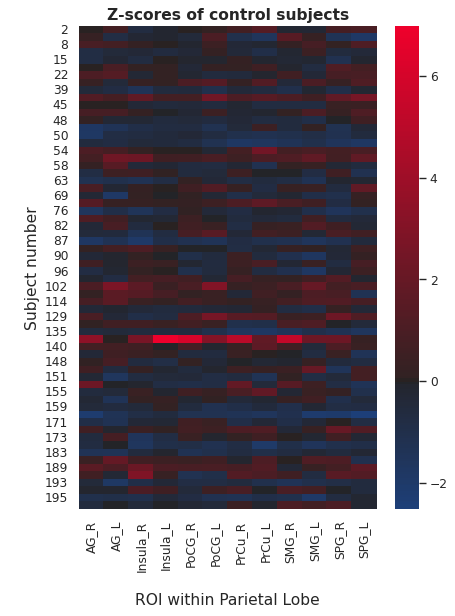

In [ ]:
# Control Dataset barcodes

cols = list(df_control.columns)
cols.remove('Subject_ID')

z_dat_control = pd.DataFrame()
for col in cols:
  z = col
  z_dat_control[z] = (df_control[col] - control_stats[col]['mean'])/control_stats[col]['std']


plt.figure(figsize=(6,8), dpi=80)
cmap = sns.diverging_palette(259, 10, s= 100, n = 80, center = 'dark', as_cmap=True)

#sns.heatmap(z_dat, center=0, cmap=sns.diverging_palette(240, 20, as_cmap=True), vmin = -1, vmax = 1)
#sns.color_palette("icefire", as_cmap=True)
sns.heatmap(z_dat_control, center=0,cmap=cmap)
plt.title('Z-scores of control subjects',fontweight="bold", fontsize=14)
plt.xlabel('\nROI within Parietal Lobe', fontsize=14), plt.ylabel('\nSubject number', fontsize=14)

(Text(0.5, 32.0, '\nROI within Parietal Lobe'), Text(72.0, 0.5, '\nSubject'))

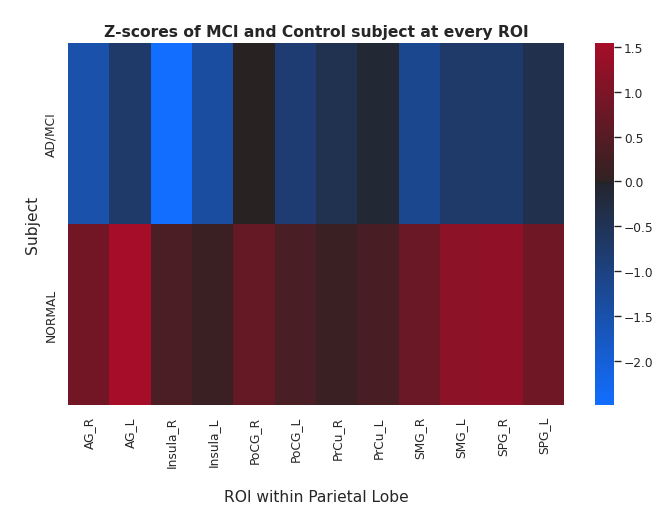

In [ ]:
#Lets look at the bar codes of a patient with Alziehimers and a control patient
few_df = sorted_df.nth(36)

#ad = df_ad.iloc[[5]]
#control = df_control.iloc[[5]]

#merging = [ad, control]
#few_df = pd.concat(merging)


cols = list(few_df.columns)
cols.remove('Subject_ID')
#cols.remove('Diagnosis')

z_dat_few = pd.DataFrame()
for col in cols:
  z = col
  z_dat_few[z] = (few_df[col] - control_stats[col]['mean'])/control_stats[col]['std']


# plot figure
plt.figure(figsize=(10, 6), dpi=80)
#sns.color_palette("icefire", as_cmap=True)
cmap = sns.diverging_palette(259, 10, s= 100, n = 80, center = 'dark', as_cmap=True)

sns.heatmap(z_dat_few, center=0, cmap = cmap)
plt.title('\nZ-scores of MCI and Control subject at every ROI', fontsize=14, fontweight='bold')
plt.xlabel('\nROI within Parietal Lobe', fontsize=14), plt.ylabel('\nSubject', fontsize=14)


In [ ]:
# Given subject analysis info for better visualization: - just change order to better visualize rois

#Change columns location
z_reorder = z_dat[['PoCG_L','SPG_L','SMG_L','AG_L','PrCu_L','Insula_L','PoCG_R','SPG_R','SMG_R','AG_R','PrCu_R','Insula_R']]
z_reorder.head()

plt.figure(figsize=(6, 10), dpi=300)
cmap = sns.diverging_palette(259, 10, s=100, n = 80, center="dark")
sns.heatmap(z_reorder, center=0, cmap = cmap)
plt.title('Z-scores of each subject at every ROI')
plt.xlabel('ROI within Parietal Lobe'), plt.ylabel('Subject number')


# z_score of ADNI patient
ADNI = df[df["Diagnosis"] == "AD/MCI"]
NORMAL = df[df["Diagnosis"] == "NORMAL"]
ADNI = ADNI[['PoCG_L','SPG_L','SMG_L','AG_L','PrCu_L','Insula_L','PoCG_R','SPG_R','SMG_R','AG_R','PrCu_R','Insula_R']]
NORMAL = NORMAL[['PoCG_L','SPG_L','SMG_L','AG_L','PrCu_L','Insula_L','PoCG_R','SPG_R','SMG_R','AG_R','PrCu_R','Insula_R']]
cols = list(ADNI.columns)
z_ADNI = pd.DataFrame()
for col in cols:
  z = col
  z_ADNI[z] = (ADNI[col] - control_stats[col]['mean'])/control_stats[col]['std']
cols = list(NORMAL.columns)
z_NORMAL = pd.DataFrame()
for col in cols:
  z = col
  z_NORMAL[z] = (NORMAL[col] - control_stats[col]['mean'])/control_stats[col]['std']
z_ADNI.reset_index(drop=True, inplace=True)
z_NORMAL.reset_index(drop=True, inplace=True)
z_ADNI


plt.figure(figsize=(6, 10), dpi=300)
cmap = sns.diverging_palette(259, 10, s=100, n = 80, center="dark")
sns.heatmap(z_ADNI, center=0, cmap=cmap)
plt.title('Z-scores of patient with AD at every ROI')
plt.xlabel('ROI within Parietal Lobe'), plt.ylabel('Subject number')

plt.figure(figsize=(6, 10), dpi=300)
cmap = sns.diverging_palette(259, 10, s=100, n = 80, center="dark")
sns.heatmap(z_NORMAL, center=0,cmap = cmap)
plt.title('Z-scores of normal patient at every ROI')
plt.xlabel('ROI within Parietal Lobe'), plt.ylabel('Subject number')

In [ ]:
mricloud = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mricloud.csv')

In [ ]:
mricloud = mricloud[['Object','Pixels']]
mri = mricloud.T
mri.columns = mri.iloc[0]
mri.drop('Object')
mri = mri.iloc[1: , :]

mri = mri[['AG_R','AG_L','Insula_R','Insula_L','PoCG_R','PoCG_L','PrCu_R','PrCu_L','SMG_R','SMG_L' ,'SPG_R','SPG_L']]
print(mri)
print(control_stats)

Object  AG_R  AG_L Insula_R Insula_L PoCG_R  ... PrCu_L SMG_R SMG_L SPG_R SPG_L
Pixels  8830  6262     8975     9337   9348  ...   7391  6017  6826  4512  6292

[1 rows x 12 columns]
          AG_R     AG_L  Insula_R  Insula_L  ...    SMG_R    SMG_L    SPG_R    SPG_L
mean  10971.95  6593.95   6535.30   6371.80  ...  8598.64  8299.59  6154.12  7495.45
std    1439.98   947.13    859.75   1601.85  ...  1663.99  1254.11   943.46  1032.43

[2 rows x 12 columns]


(Text(0.5, -64.75, 'ROI within Parietal Lobe'),)

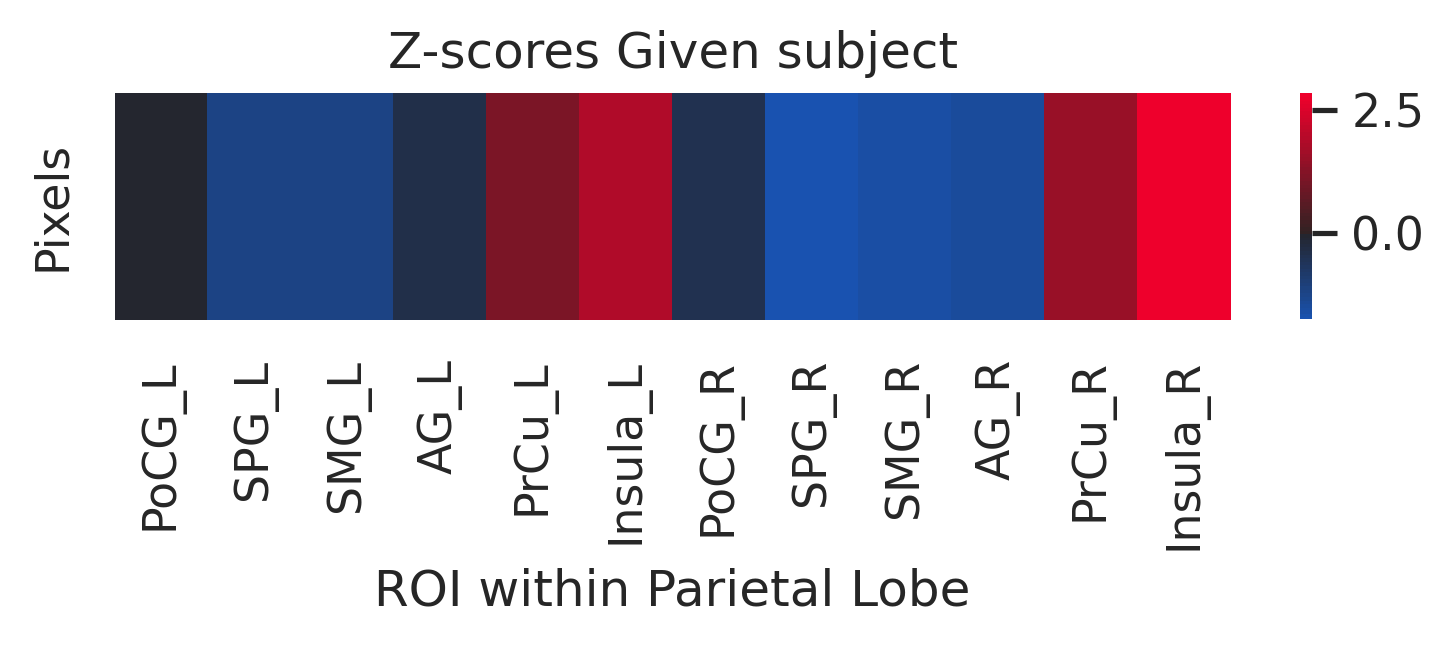

In [ ]:
mri_z = pd.DataFrame()
cols = list(mri.columns)

for col in cols:
  z = col
  mri_z[z] = (mri[col] - control_stats[col]['mean'])/control_stats[col]['std']

mri_z.astype(float)
# plot figure
mri_z = mri_z[['PoCG_L','SPG_L','SMG_L','AG_L','PrCu_L','Insula_L','PoCG_R','SPG_R','SMG_R','AG_R','PrCu_R','Insula_R']]
plt.figure(figsize=(6, 1), dpi=300)
mri_z.fillna(value=np.nan, inplace=True)
cmap = sns.diverging_palette(259, 10, s=100, n = 80, center="dark")
sns.heatmap(mri_z, center=0, cmap = cmap)
plt.title('Z-scores Given subject')
plt.xlabel('ROI within Parietal Lobe')

In [ ]:
#Box-plots and other analysis


df_small = dat[['Diagnosis','Age','Gender','AG_R','AG_L','Insula_R','Insula_L','PoCG_R','PoCG_L','PrCu_R','PrCu_L','SMG_R','SMG_L' ,'SPG_R','SPG_L']]
df_small['Gender'] = df_small['Gender'].str.strip("\'")
df_small['Diagnosis'] = df_small['Diagnosis'].str.strip("\'")
sorted_df_small = df_small.groupby('Diagnosis')
sorted_df_small.groups
df_ad_small = sorted_df_small.get_group('AD/MCI')
df_ad_small

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Diagnosis,Age,Gender,AG_R,AG_L,Insula_R,Insula_L,PoCG_R,PoCG_L,PrCu_R,PrCu_L,SMG_R,SMG_L,SPG_R,SPG_L
0,AD/MCI,69.6712,M,10758,6358,7183,6567,10893,11337,6783,7223,9084,9156,6550,9225
1,AD/MCI,85.3836,F,9418,6029,6825,6494,9066,8872,5033,5991,7544,8004,5151,7108
4,AD/MCI,79.9918,M,11657,6737,5196,5189,12172,12538,6941,8185,10989,8135,6577,8252
5,AD/MCI,82.9041,F,8086,5125,5037,5415,10031,10293,4657,5117,6833,6677,4927,4766
6,AD/MCI,88.4521,F,8420,5573,4885,4449,9716,9385,5271,5882,6692,7019,4734,5822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,AD/MCI,81.0274,M,11206,6596,5803,6167,10766,10434,5874,6794,7715,8483,5612,7748
192,AD/MCI,76.6630,F,10815,5924,6791,6211,9302,9579,5621,6211,8402,8362,6326,7904
196,AD/MCI,85.1589,M,11283,6834,6588,6495,12113,11093,6207,6069,9066,9858,5855,7306
197,AD/MCI,66.9014,F,9606,6143,6281,6013,10408,10639,4415,5583,6964,7205,5817,7698


In [ ]:
df_melted = pd.melt(df_small, id_vars=['Diagnosis', 'Age','Gender'],var_name='Area',value_name='Volume')
df_melted.head()

,Diagnosis,Age,Gender,Area,Volume
0,AD/MCI,69.6712,M,AG_R,10758
1,AD/MCI,85.3836,F,AG_R,9418
2,NORMAL,86.2904,F,AG_R,11015
3,NORMAL,73.9342,M,AG_R,11322
4,AD/MCI,79.9918,M,AG_R,11657


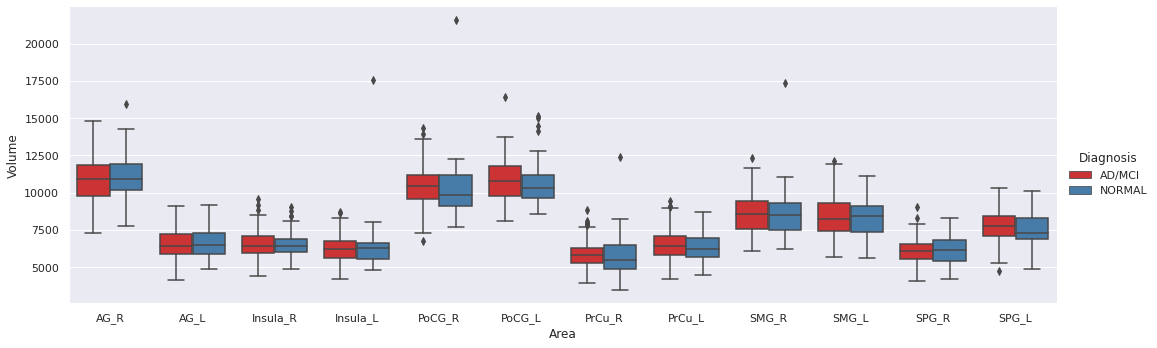

In [ ]:
sns.catplot(x = 'Area', y = 'Volume',hue='Diagnosis',data=df_melted,kind='box',aspect= 3, palette='Set1')


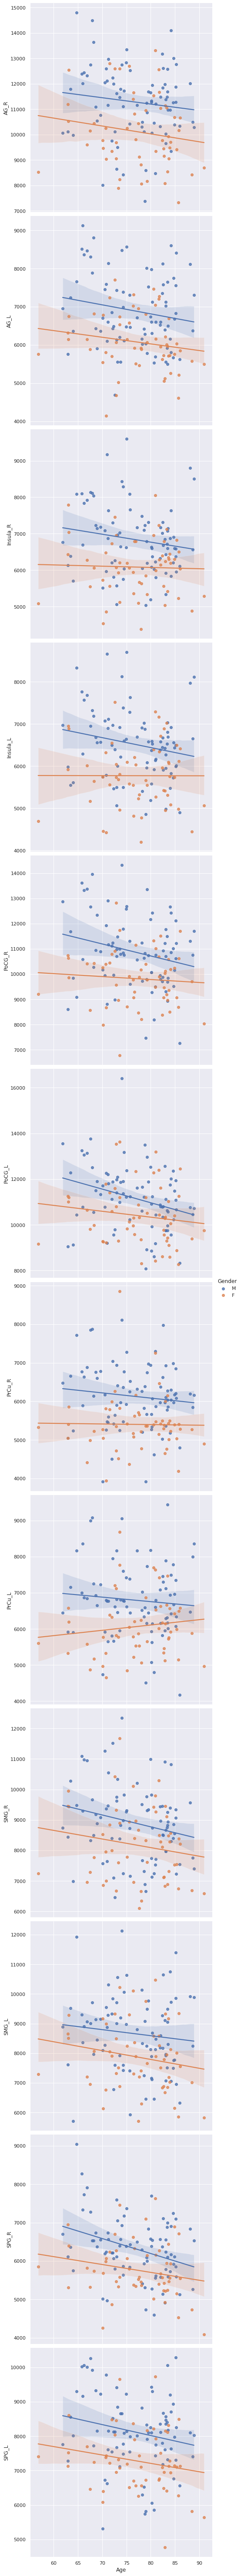

In [ ]:
sns.pairplot(df_ad_small,y_vars=['AG_R','AG_L','Insula_R','Insula_L','PoCG_R','PoCG_L','PrCu_R','PrCu_L','SMG_R','SMG_L' ,'SPG_R','SPG_L'],x_vars=['Age'],hue='Gender',kind='reg',height=7)

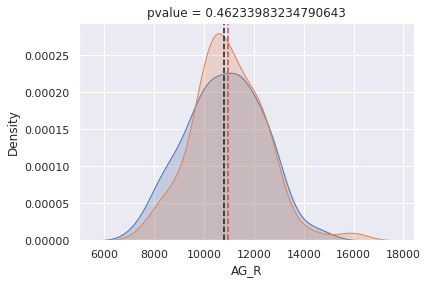

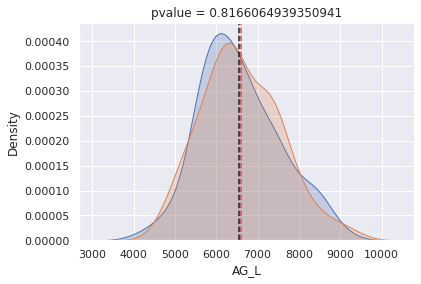

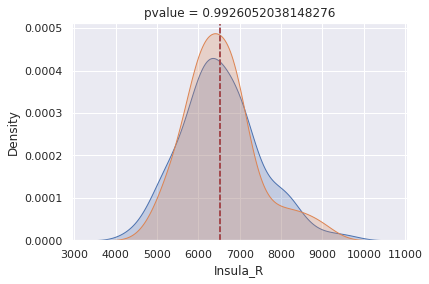

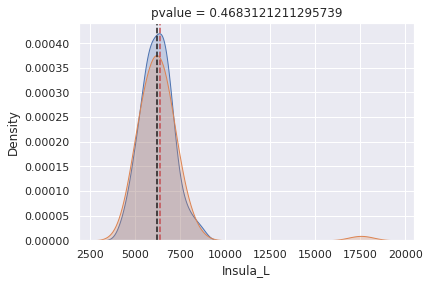

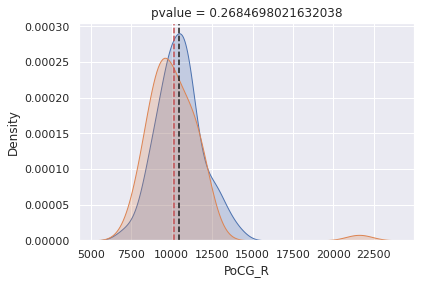

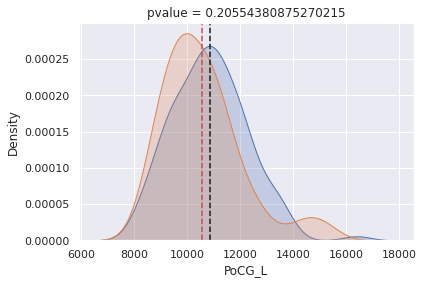

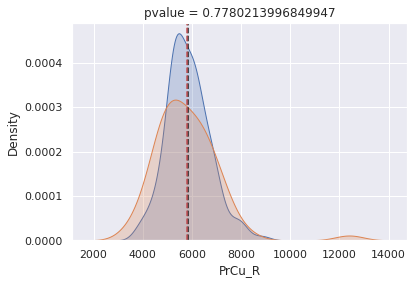

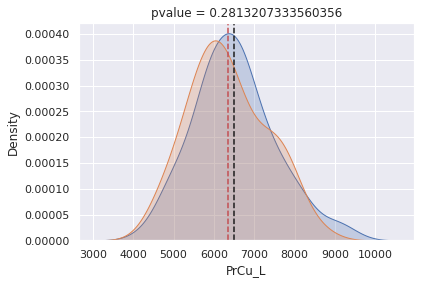

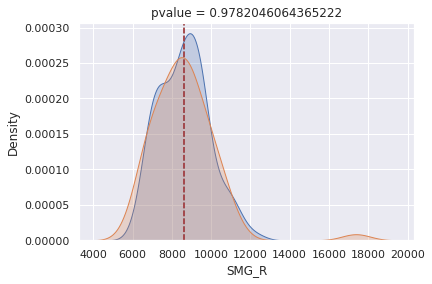

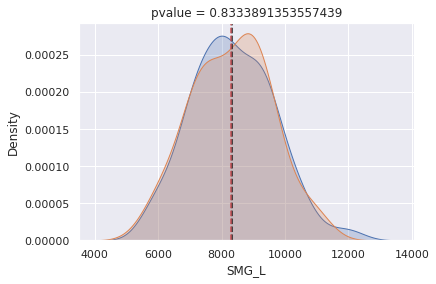

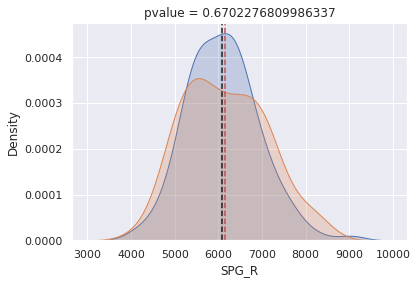

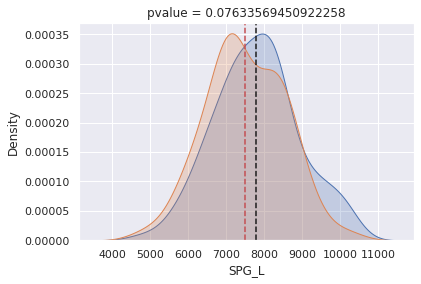

In [ ]:
# T-test
from scipy import stats


col=['AG_R','AG_L','Insula_R','Insula_L','PoCG_R','PoCG_L','PrCu_R','PrCu_L','SMG_R','SMG_L' ,'SPG_R','SPG_L']
for cols in range(12):
 plt.figure()
 sns.kdeplot(df_ad[col[cols]],shade='True')
 sns.kdeplot(df_control[col[cols]],shade='True')
 plt.axvline(np.mean(df_ad[col[cols]]),color="k",linestyle='dashed')
 plt.axvline(np.mean(df_control[col[cols]]),color="r",linestyle='dashed')
 sts,pValue = stats.ttest_ind(df_ad[col[cols]], df_control[col[cols]], equal_var = False)
 plt.title('pvalue = '+str(pValue))
 plt.show()
